Name :Dhanashree M
Reg No: 212221230018

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
single_image= X_train[0]

In [7]:
single_image.shape

(28, 28)

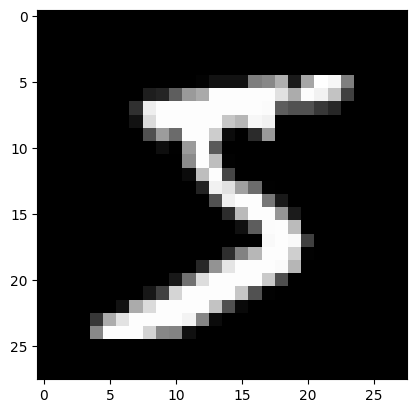

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()


0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

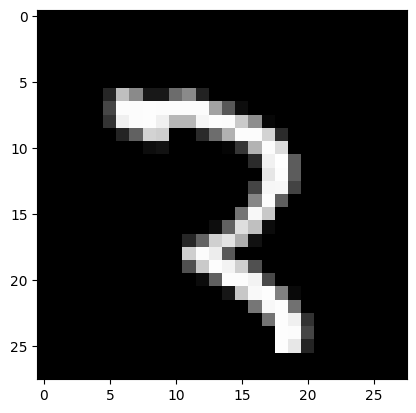

In [19]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [20]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [49]:
print("NAME : DHANASHREE M")
print("REG NO : 212221230018")

NAME : DHANASHREE M
REG NO : 212221230018


In [23]:
model = keras.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 46ms/step - accuracy: 0.8988 - loss: 0.3467 - val_accuracy: 0.9804 - val_loss: 0.0619
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9831 - loss: 0.0583 - val_accuracy: 0.9800 - val_loss: 0.0590
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.9894 - loss: 0.0364 - val_accuracy: 0.9848 - val_loss: 0.0468
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.9924 - loss: 0.0259 - val_accuracy: 0.9862 - val_loss: 0.0433
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.9953 - loss: 0.0170 - val_accuracy: 0.9852 - val_loss: 0.0463


In [28]:
metrics = pd.DataFrame(model.history.history)

In [52]:
print("NAME :DHANASHREE M   REG NO:212221230018")

NAME :DHANASHREE M   REG NO:212221230018


In [51]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.948767,0.174318,0.9804,0.061935
1,0.982883,0.056779,0.9800,0.059016
2,0.988850,0.037037,0.9848,0.046788
3,0.992183,0.025767,0.9862,0.043344
4,0.994483,0.018619,0.9852,0.046257


NAME :DHANASHREE M   REG NO:212221230018


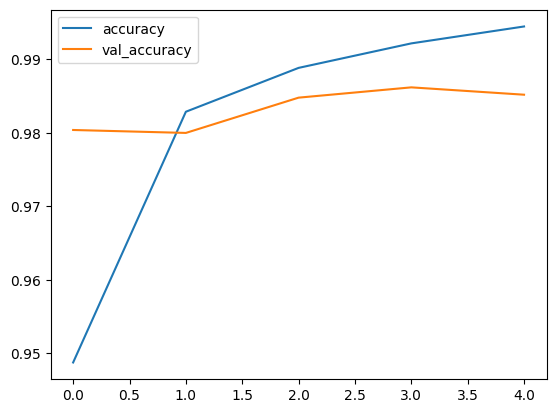

In [53]:
metrics[['accuracy','val_accuracy']].plot()
print("NAME :DHANASHREE M   REG NO:212221230018")

NAME :DHANASHREE M   REG NO:212221230018


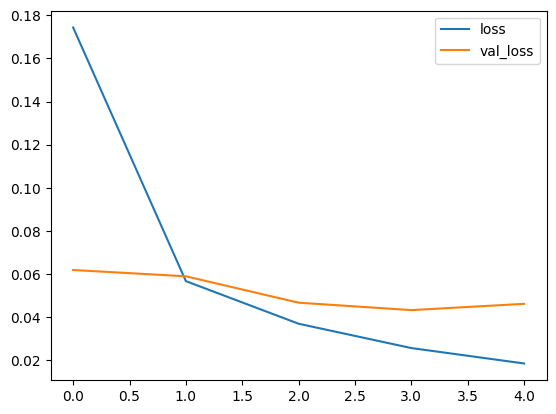

In [54]:
metrics[['loss','val_loss']].plot()
print("NAME :DHANASHREE M   REG NO:212221230018")

In [32]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [55]:
print(confusion_matrix(y_test,x_test_predictions))
print("NAME :DHANASHREE M   REG NO:212221230018")

[[ 973    0    0    0    1    1    1    2    1    1]
 [   0 1126    3    1    1    0    1    0    3    0]
 [   1    1 1009    2    1    0    0    6   10    2]
 [   0    0    1  993    0    5    0    2    6    3]
 [   0    0    0    0  979    0    1    0    0    2]
 [   1    0    0    7    0  878    2    0    3    1]
 [   7    2    0    1    4    4  936    0    4    0]
 [   0    2    5    0    3    0    0 1011    1    6]
 [   2    0    1    0    1    1    0    2  962    5]
 [   0    0    0    2   11    4    0    4    3  985]]
NAME :DHANASHREE M   REG NO:212221230018


In [56]:
print(classification_report(y_test,x_test_predictions))
print("NAME :DHANASHREE M   REG NO:212221230018")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

NAME :DHANASHREE M   REG NO:212221230018


In [35]:
img = image.load_img('num.png')

In [36]:
type(img)

PIL.Image.Image

In [40]:
img = image.load_img('num.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [41]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [42]:
print(x_single_prediction)

[7]


NAME :DHANASHREE M   REG NO:212221230018


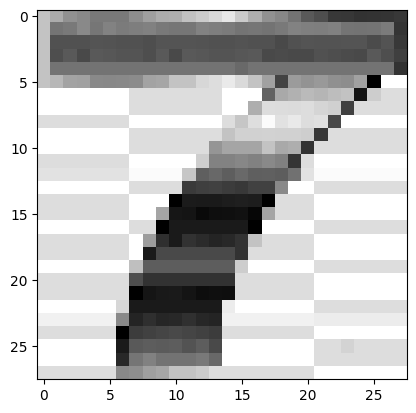

In [57]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("NAME :DHANASHREE M   REG NO:212221230018")

In [44]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [45]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [58]:
print(x_single_prediction)
print("NAME :DHANASHREE M   REG NO:212221230018")

[7]
NAME :DHANASHREE M   REG NO:212221230018
